<a href="https://colab.research.google.com/github/Jayasurya227/Vision-AI-Fundamentals-Building-a-Digit-Recognizer-from-Scratch/blob/main/Vision_AI_Fundamentals_Building_a_Digit_Recognizer_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Import the Necessary Libraraies**

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

** Step 2:Load the Data**

In [5]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/fashion_mnist/__init__.py'>

In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
train_labels.shape

(60000,)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
test_labels.shape

(10000,)

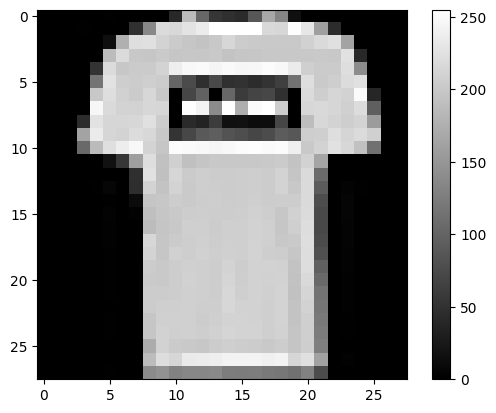

In [11]:
plt.figure()
plt.imshow(train_images[1], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_labels_one_hot=to_categorical(train_labels,num_classes=10)
test_labels_one_hot=to_categorical(test_labels,num_classes=10)

In [13]:
train_labels_one_hot.shape

(60000, 10)

In [15]:
test_labels_one_hot.shape

(10000, 10)

In [14]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [16]:
test_labels_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
ann_model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_model.fit(
    train_images,
    train_labels_one_hot,
    batch_size=128,
    epochs=5,
    validation_data=(test_images,test_labels_one_hot)
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8181 - loss: 0.4723 - val_accuracy: 0.7904 - val_loss: 0.6241
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8198 - loss: 0.4609 - val_accuracy: 0.7871 - val_loss: 0.6286
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8185 - loss: 0.4760 - val_accuracy: 0.7892 - val_loss: 0.6488
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8192 - loss: 0.4722 - val_accuracy: 0.7909 - val_loss: 0.6359
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8225 - loss: 0.4549 - val_accuracy: 0.7907 - val_loss: 0.6315


**IF we want to get very best Accuracy we need to change the Batch_Size**

In [ ]:
ann_model.fit(
    train_images,
    train_labels_one_hot,
    batch_size=60,
    epochs=5,
    validation_data=(test_images,test_labels_one_hot)
)

Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8093 - loss: 0.4939 - val_accuracy: 0.7730 - val_loss: 0.6539
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8157 - loss: 0.4870 - val_accuracy: 0.7757 - val_loss: 0.7015
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8163 - loss: 0.5283 - val_accuracy: 0.7898 - val_loss: 0.6784
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8169 - loss: 0.4831 - val_accuracy: 0.7948 - val_loss: 0.6351
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8187 - loss: 0.4704 - val_accuracy: 0.7877 - val_loss: 0.7077


In [18]:
basic_cnn_model=keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

basic_cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
basic_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       495,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515,146 (1.97 MB)

 Trainable params: 515,146 (1.97 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
basic_cnn_model.fit(
    train_images,
    train_labels_one_hot,
    batch_size=128,
    epochs=2,
    validation_data=(test_images,test_labels_one_hot)
)

Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 102ms/step - accuracy: 0.9131 - loss: 0.2376 - val_accuracy: 0.8906 - val_loss: 0.3103
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - accuracy: 0.9273 - loss: 0.1944 - val_accuracy: 0.8947 - val_loss: 0.3115


In [34]:
basic_cnn_model.predict(np.expand_dims(train_images[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[1.4913342e-08, 4.4299449e-09, 1.5000465e-08, 3.0687437e-09,
        7.2894650e-09, 2.4449985e-06, 1.6553191e-11, 5.4852557e-03,
        3.0865184e-09, 9.9451220e-01]], dtype=float32)

In [35]:
np.expand_dims(train_images[0],axis=0).shape

(1, 28, 28)

In [36]:
ann_model.predict(np.expand_dims(train_images[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 7.6386986e-35]], dtype=float32)

In [37]:
train_labels_one_hot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [39]:
for indx,output in enumerate(basic_cnn_model.predict(np.expand_dims(train_images[0],axis=0))):
  print(indx,output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
0 [1.4913342e-08 4.4299449e-09 1.5000465e-08 3.0687437e-09 7.2894650e-09
 2.4449985e-06 1.6553191e-11 5.4852557e-03 3.0865184e-09 9.9451220e-01]


In [38]:
for indx,output in enumerate(ann_model.predict(np.expand_dims(train_images[0],axis=0))):
  print(indx,output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
0 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.6386986e-35]


In [40]:
np.argmax(basic_cnn_model.predict(np.expand_dims(train_images[0],axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


np.int64(9)

In [41]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [42]:
train_labels[0]

np.uint8(9)

In [45]:
# Load an image
import cv2
image_path = '/content/Shoe image.jpeg'  # Replace with the actual path to your image
image=cv2.imread(image_path)

In [47]:
image.shape

(2250, 3000, 3)

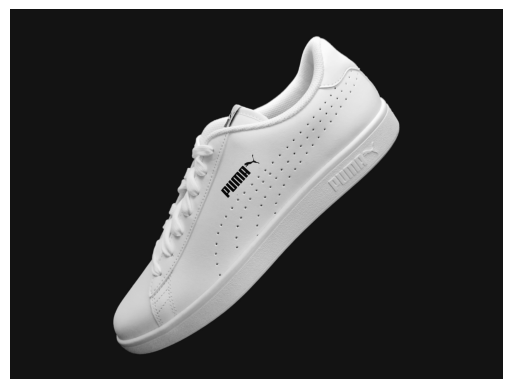

In [52]:
import matplotlib.pyplot as plt

if image is not None:
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()
else:
  print("Cannot plot image as it was not loaded successfully")

In [53]:
resized_image = cv2.resize(image, (28, 28))
print("Resized image shape:", resized_image.shape)

Resized image shape: (28, 28, 3)


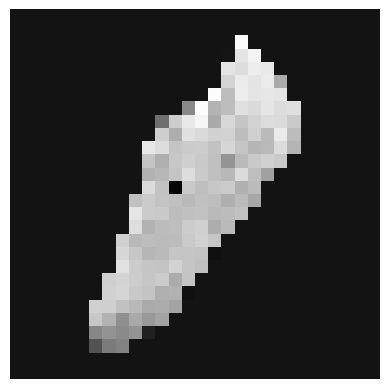

In [54]:
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [55]:
print(resized_image.shape)

(28, 28, 3)


In [60]:
# Convert to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Reshape for the model
processed_image = np.expand_dims(gray_image, axis=0)

ann_model.predict(processed_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4042717e-37,
        1.1924578e-08, 9.8336571e-01, 1.6634312e-02, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [61]:
np.argmax(ann_model.predict(np.expand_dims(gray_image,axis=0)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


np.int64(5)